## Import Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

In [54]:
train.to_csv("clean_banget.csv", index=False)

In [ ]:
# data2 = pd.read_csv("data2.csv", sep= ";")
# data2.groupby(by='label').count()
# data2

In [ ]:
# filtered = ['joy', 'sadness']

In [ ]:
# data2 = data2[data2['label'].isin(filtered)].reset_index(drop=True)
# data2.groupby(by='label').count()

In [ ]:
# train = pd.read_csv('Data_deleted.csv')
# train = train.sample(frac=1).reset_index(drop=True)
# train = train[["label", "tweet"]]

# train

In [ ]:
# train1 = train[train['label'].isin(['fear', 'anger'])].reset_index(drop=True)
# train1.groupby(by='label').count()

In [ ]:
# train_fix = pd.concat([data2, train1], axis=0).reset_index(drop=True)
# train_fix.groupby(by='label').count()

In [ ]:
# train = train_fix
# train = train.sample(frac=1).reset_index(drop=True)
# train

In [ ]:
# train.describe()

In [ ]:
# # Filter the DataFrame to include only rows where the 'label' column is in the list of specified emotions
# filtered_emotions = ['anger', 'fear', 'joy', 'sadness']
# filtered_train = train[train['label'].isin(filtered_emotions)]

# # Display the resulting DataFrame
# filtered_train


In [ ]:
# train.info()

In [2]:
train = pd.read_csv('Data_deleted.csv')
train = train.sample(frac=1).reset_index(drop=True)
train = train[["label", "tweet"]]

train

,label,tweet
0,sadness,Saya merasa cukup kuat bahwa siswa harus dihuk...
1,sadness,Saya memiliki untuk diri saya sendiri bahkan k...
2,joy,Saya secara resmi merasa meriah
3,joy,Saya merasa beruntung bahwa mereka menemukanny...
4,fear,sabtu pagi bukannya dapat kabar gembira malah ...
...,...,...
19695,fear,"Aku gak salah bila mohon pd [USERNAME], segera..."
19696,joy,Saya memberi mereka sedikit sesuatu dari simpa...
19697,joy,"Baca buku ini diawal senyum, ditengah-tengah s..."
19698,fear,aku lebih takut liat bird japan ketemu bam


In [3]:
train['num_label'] = train['label'].map({'anger':0, 'fear':1, 'joy':2, 'love':2, 'sadness':3})
train.head()

,label,tweet,num_label
0,sadness,Saya merasa cukup kuat bahwa siswa harus dihuk...,3
1,sadness,Saya memiliki untuk diri saya sendiri bahkan k...,3
2,joy,Saya secara resmi merasa meriah,2
3,joy,Saya merasa beruntung bahwa mereka menemukanny...,2
4,fear,sabtu pagi bukannya dapat kabar gembira malah ...,1


In [4]:
train.groupby(by="num_label").count()

,label,tweet
num_label,,
0,3974,3974
1,3415,3415
2,7521,7521
3,4790,4790


In [5]:
# # inbalance class
# -nambah data
# -samain
# -balancing smote/oversampling
# ilt 1/2
# cari data
# feature eng
# data mentok :
#     mencari count masing-masing kata
#     membuat kolom baru
#     sedih
#     kata mana yang paling sering keluar
#     dicount
#     ini jadi feature baru jadi label lain
    
#     panjang kata
#     kecenderungan kata lebih panjang --> sedih/seneng dll
    
#     Pahami datanya



# analisis persebaran data/data baru tentuin metodenya
# liat format
# formal/informal 
# stopword --> disesuaikan dgn formal/informal


# dataoversamppling <10% (biasanaya) (nambahnya jangna kebanyakan)




## Data Preprocessing

In [11]:
# !pip install emoji
# !pip install python-crfsuite
!pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)


In [12]:
import re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import CRFTagger
excelstopwords = pd.read_excel('stopwords.xlsx')
kamusalay= pd.read_csv("kamusalay.csv")
import re
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [13]:
def lowercase(review):
    return review.lower() #dari python langsung, bkn dari external library

# hapus URL
def remove_url(review):
    return re.sub(r'http\S+', '', review)

def remove_hashtags(review):
    # Pola regex untuk mendeteksi hashtag
    pattern = r'#\w+'
    return re.sub(pattern, '', review)


#KAMUS ALAY
def alay(review):
    alay_dic = kamusalay.to_dict()
    alay_dic = dict(zip(kamusalay.iloc[:,0], kamusalay.iloc[:,1]))
    words = review.split()
    for i in range(len(words)):
        word = words[i]
        if word in alay_dic.keys():
            words[i] = alay_dic[word]
    sentence = " ".join(words)
    return sentence

def remove_square_brackets(review):
    # Menghapus teks di dalam kurung siku beserta kurungnya
    return re.sub(r'\[.*?\]', '', review)

# hapus irrelevant char(angka, simbol, tanda baca)
def remove_irrelevant(review):
    return re.sub('[^a-zA-Z\s]', ' ', review)

# hapus spasi lebih dari 1
def remove_space(review):
    review= re.sub(r'\s+', ' ', review)
    review= review.replace('\n', ' ')
    review= review.replace('\\n', ' ')
    review= review.replace('\t', ' ')
    review= review.replace('\\t', ' ')
    review= review.replace('\\u', ' ')
    review= review.replace('\\', ' ')
    return review

# hapus emoji
def remove_emoji(review):
    emoji_pattern= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticon
                           u"\U0001F300-\U0001F5FF"  # simbol & dingbat
                           u"\U0001F680-\U0001F6FF"  # transportasi & simbol map
                           u"\U0001F700-\U0001F77F"  # simbol kuno
                           u"\U0001F780-\U0001F7FF"  # simbol kuno tambahan
                           u"\U0001F800-\U0001F8FF"  # simbol tanda batas
                           u"\U0001F900-\U0001F9FF"  # emoticon tambahan
                           u"\U0001FA00-\U0001FA6F"  # simbol musik
                           u"\U0001FA70-\U0001FAFF"  # simbol musik tambahan
                           u"\U00002702-\U000027B0"  # simbol karakter
                           u"\U000024C2-\U0001F251"  # simbol katakter tambahan
                           "]+", flags= re.UNICODE)
    return emoji_pattern.sub(r'', review)


#REMOVING REPEAT CHARACTER
def repeat_char(review):
    review= re.sub('([A-Za-z])\\1{2,}','\\1', review)
    return review


#Remove Stopword Indo
def remove_stopwords(sentence):
    stopwords_list = [
    "ada", "adalah", "akan", "aku", "anda", "apa", "apakah", "atas", "atau",
    "bagaimana", "banyak", "bahwa", "bagi", "baru", "beberapa", "belum", "bisa",
    "bukan", "dalam", "dan", "dengan", "di", "dari", "demi", "dia", "hingga",
    "itu", "ini", "jadi", "jika", "juga", "karena", "ke", "kita", "lagi",
    "maka", "mereka", "oleh", "pada", "saat", "saya", "sejak", "sebagai", 
    "sedang", "sekarang", "setiap", "setelah", "tetapi", "tidak", "untuk", 
    "yang"
    ]
    
    #sasatrawi -stemming
    
#     stopwords_list = list(excelstopwords['stopwords'])
    words = sentence.split()
    no_words = [w for w in words if w not in stopwords_list]
    sentence = " ".join(no_words)
    return sentence


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Stemming function
def stemmed(review):
    return stemmer.stem(review)



In [14]:
def df_prep(train):
    train['filtering']= train['tweet'].apply(lowercase)
    train['filtering']= train['filtering'].apply(remove_hashtags)
    train['filtering']= train['filtering'].apply(remove_url)
   # train['filtering']= train['filtering'].apply(alay)
    train['filtering']= train['filtering'].apply(remove_square_brackets)
    train['filtering']= train['filtering'].apply(remove_irrelevant)
    train['filtering']= train['filtering'].apply(remove_space)
    train['filtering']= train['filtering'].apply(remove_emoji)
    train['filtering']= train['filtering'].apply(repeat_char)
    train["filtering"]= train["filtering"].apply(remove_stopwords)
    train['filtering']= train['filtering'].apply(stemmed)
    return train

In [15]:
train = df_prep(train)
train = train[train['filtering'] != ""].reset_index(drop=True)
train['length'] = train['filtering'].apply(len)
train

,label,tweet,num_label,filtering,length
0,sadness,Saya merasa cukup kuat bahwa siswa harus dihuk...,3,rasa cukup kuat siswa harus hukum berapa baik ...,102
1,sadness,Saya memiliki untuk diri saya sendiri bahkan k...,3,milik diri sendiri bahkan ketika rasa jelek,43
2,joy,Saya secara resmi merasa meriah,2,cara resmi rasa riah,20
3,joy,Saya merasa beruntung bahwa mereka menemukanny...,2,rasa untung temu rasa untung milik orang orang...,61
4,fear,sabtu pagi bukannya dapat kabar gembira malah ...,1,sabtu pagi bukan dapat kabar gembira malah dap...,120
...,...,...,...,...,...
19694,fear,"Aku gak salah bila mohon pd [USERNAME], segera...",1,gak salah bila mohon pd segera perintah menkes...,207
19695,joy,Saya memberi mereka sedikit sesuatu dari simpa...,2,beri sedikit sesuatu simpan paypal orang luar ...,95
19696,joy,"Baca buku ini diawal senyum, ditengah-tengah s...",2,baca buku awal senyum tengah tengah senyum mir...,79
19697,fear,aku lebih takut liat bird japan ketemu bam,1,lebih takut liat bird japan ketemu bam,38


In [16]:
train_split = 0.9
train_size = int(len(train['filtering'])*train_split)
train_size

17729

In [17]:
traindata = train[0:train_size]
valdata = train[train_size:]

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam


# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
max_length = 200 
#train['length'].max()
vocab_size = 5000 #coba dikecilkan biar ga overfit len(unique())
embedding_dim = 32 

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Generate the word index dictionary
tokenizer.fit_on_texts(traindata['filtering'])
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(traindata['filtering'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the validation sequences
validation_sequences = tokenizer.texts_to_sequences(valdata['filtering'])
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


#pre trained model (embedding vector trained) last choice


## Build Model

In [19]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(5000, 16, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

# learning_rate = 0.001
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

In [20]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(4, activation='softmax')
])

#learning_rate = 0.001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

#implementasi momentum --> untuk mencegah stuck local minima --> goal global minima


In [24]:
import tensorflow as tf

# Define the model architecture with an added Conv1D layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),  # Add Conv1D layer with 32 filters and a kernel size of 3
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 32)           3104      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [25]:
num_epochs = 20
BATCH_SIZE = 128
history = model.fit(training_padded, traindata['num_label'], batch_size = BATCH_SIZE, epochs=num_epochs,
                    validation_data=(validation_padded, valdata['num_label']), verbose=2)

Epoch 1/20
139/139 - 5s - loss: 1.3481 - accuracy: 0.3762 - val_loss: 1.3276 - val_accuracy: 0.3959
Epoch 2/20
139/139 - 5s - loss: 1.2829 - accuracy: 0.3966 - val_loss: 1.1687 - val_accuracy: 0.4736
Epoch 3/20
139/139 - 5s - loss: 1.0692 - accuracy: 0.5025 - val_loss: 0.9700 - val_accuracy: 0.5848
Epoch 4/20
139/139 - 5s - loss: 0.9287 - accuracy: 0.5932 - val_loss: 0.8852 - val_accuracy: 0.6223
Epoch 5/20
139/139 - 5s - loss: 0.8553 - accuracy: 0.6333 - val_loss: 0.8578 - val_accuracy: 0.6371
Epoch 6/20
139/139 - 5s - loss: 0.8080 - accuracy: 0.6643 - val_loss: 0.8288 - val_accuracy: 0.6655
Epoch 7/20
139/139 - 5s - loss: 0.7580 - accuracy: 0.6888 - val_loss: 0.8151 - val_accuracy: 0.6731
Epoch 8/20
139/139 - 5s - loss: 0.7232 - accuracy: 0.7092 - val_loss: 0.7967 - val_accuracy: 0.6822
Epoch 9/20
139/139 - 5s - loss: 0.6862 - accuracy: 0.7275 - val_loss: 0.7748 - val_accuracy: 0.6980
Epoch 10/20
139/139 - 5s - loss: 0.6487 - accuracy: 0.7452 - val_loss: 0.7569 - val_accuracy: 0.7076

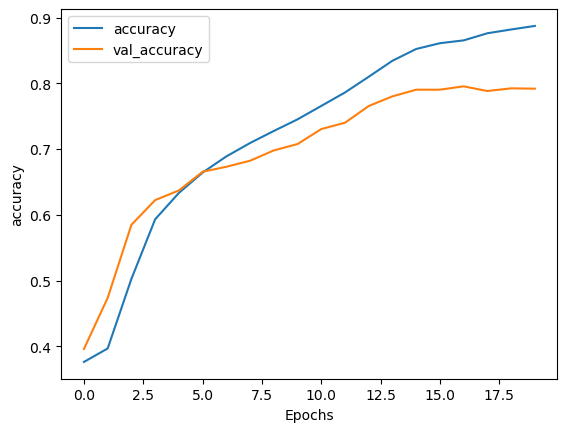

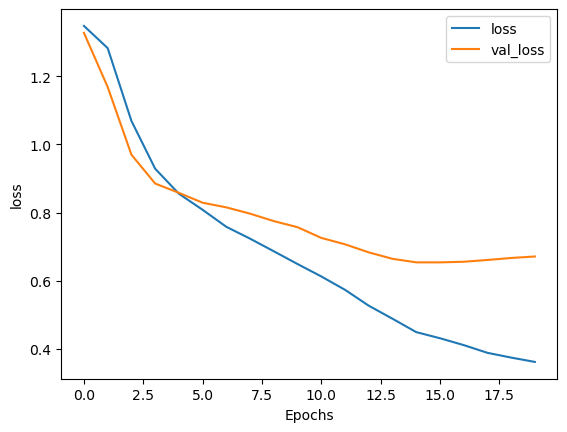

In [26]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Predicting

In [27]:
text = ''"Brosis, hari ini gue lagi on the way ke kampus bareng pacar, tiba-tiba ada anjing yang ngejar-ngejar gue, bikin deg-degan banget, ya Allah! Trus pas nyampe kampus, parkiran full banget, sampe gue sama pacar muter-muter gak dapet-dapet tempat parkir. Akhirnya, kita berdua telat masuk kelas deh! Pas udah masuk, dosen langsung nyerocos ngomel-ngomel gara-gara telat. Capek banget hari ini, apalagi sama pacar."
text

'Brosis, hari ini gue lagi on the way ke kampus bareng pacar, tiba-tiba ada anjing yang ngejar-ngejar gue, bikin deg-degan banget, ya Allah! Trus pas nyampe kampus, parkiran full banget, sampe gue sama pacar muter-muter gak dapet-dapet tempat parkir. Akhirnya, kita berdua telat masuk kelas deh! Pas udah masuk, dosen langsung nyerocos ngomel-ngomel gara-gara telat. Capek banget hari ini, apalagi sama pacar.'

In [28]:
#data test preprocessing

def prep_test(review):
    review = lowercase(review)
    review = remove_url(review)
    review = remove_irrelevant(review)
    review = remove_space(review)
    review = remove_emoji(review)
    review = repeat_char(review)
    review = remove_stopwords(review)
    text = [review]
    inference_sequences = tokenizer.texts_to_sequences(text)
    inference_padded = pad_sequences(inference_sequences, padding=padding_type, maxlen=max_length)
    return inference_padded

In [29]:
test_padded = prep_test(text)
test_padded

array([[   1,   14,   39, 1045,  398, 2761, 1062,  679,  395,  230,  230,
         571, 2929, 2929,   39,  130,  878, 1754,   52,   29,  220,  400,
         151, 1495, 1062,    1, 2430,   52,  200,   39,   10,  395, 1869,
        1869,   66,  635,  635,   84, 1109,    1,    1, 1396,  158,  262,
         322,  151,   62,  158, 1942,  268,    1, 2149, 2149,  656,  656,
        1396, 1179,   52,   14,  384,   10,  395,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [30]:
def prediction(test):
    label = ["anger", "fear", "joy", "sadness"]
    result = model.predict(test)
    index = np.argmax(result)
    hasil = label[index]
    return hasil

In [31]:
prediction(test_padded)

'fear'

In [32]:
model.predict(test_padded)

array([[3.3827680e-01, 6.5931594e-01, 2.8071113e-04, 2.1265114e-03]],
      dtype=float32)

In [33]:
validation_sequences = tokenizer.texts_to_sequences(valdata['filtering'])
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [34]:
validation_padded

array([[  90,    2,  420, ...,    0,    0,    0],
       [  28, 3092,  561, ...,    0,    0,    0],
       [  25,  177,  159, ...,    0,    0,    0],
       ...,
       [ 107,  285,  291, ...,    0,    0,    0],
       [   9,   12,  203, ...,    0,    0,    0],
       [ 889,   24, 1903, ...,    0,    0,    0]])

In [35]:
result = model.predict(validation_padded)

In [36]:
result

array([[9.5551395e-01, 2.9797306e-02, 1.1784223e-02, 2.9044750e-03],
       [1.0900823e-01, 7.9535979e-01, 2.2772122e-03, 9.3354702e-02],
       [2.2927218e-03, 5.1537412e-03, 2.2629213e-01, 7.6626146e-01],
       ...,
       [4.7986709e-05, 1.8382612e-04, 8.8829041e-01, 1.1147779e-01],
       [1.2235183e-01, 8.2633018e-01, 1.8879408e-03, 4.9430054e-02],
       [1.4926326e-05, 3.0133851e-06, 9.9995589e-01, 2.6255719e-05]],
      dtype=float32)

In [37]:
# Get the index of the maximum probability for each row
predicted_labels = np.argmax(result, axis=1)
predicted_labels

array([0, 1, 3, ..., 2, 1, 2], dtype=int64)

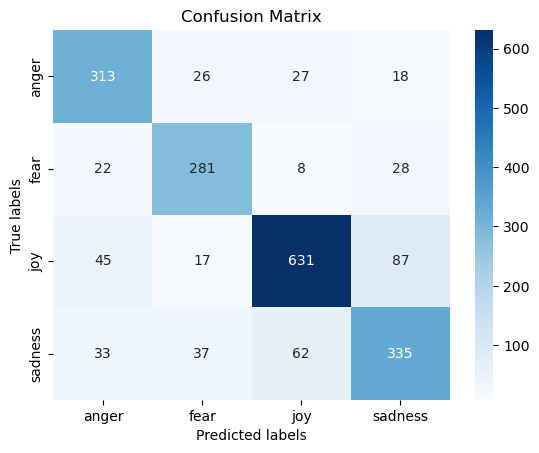

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Replace y_true and y_pred with your actual data
y_true = np.array(valdata['num_label']) # True labels
y_pred = predicted_labels  # Predicted labels

# Create the confusion matrix
label = ["anger", "fear", "joy", "sadness"]
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, cmap="Blues", annot = True, fmt='d', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
import numpy as np

# Assuming labels_array is your numpy array containing labels
unique_labels = np.unique(y_true)
print(unique_labels)


[0 1 2 3]


In [40]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7918781725888325


In [41]:
test = pd.read_excel("data_test.xlsx")
test.head()

,tweet,label
0,"Aduh, pagi-pagi udah kena macet parah di jalan...",anger
1,"Tadi pagi waktu gue jalan ke sekolah, tiba-tib...",fear
2,Hari ini gue dapet kabar kalau temen deket gue...,sadness
3,Pagi tadi gue bangun dan liat cuaca cerah bang...,happy
4,Baru aja dapet kabar kalau proyek yang gue ker...,sadness


In [42]:
test['num_label'] = test['label'].map({'anger':0, 'fear':1, 'happy':2, 'love':2, 'sadness':3})
test.head()

,tweet,label,num_label
0,"Aduh, pagi-pagi udah kena macet parah di jalan...",anger,0
1,"Tadi pagi waktu gue jalan ke sekolah, tiba-tib...",fear,1
2,Hari ini gue dapet kabar kalau temen deket gue...,sadness,3
3,Pagi tadi gue bangun dan liat cuaca cerah bang...,happy,2
4,Baru aja dapet kabar kalau proyek yang gue ker...,sadness,3


In [43]:
test = df_prep(test)
test = test[test['filtering'] != ""].reset_index(drop=True)
test

,tweet,label,num_label,filtering
0,"Aduh, pagi-pagi udah kena macet parah di jalan...",anger,0,aduh pagi pagi udah kena macet parah jalan pas...
1,"Tadi pagi waktu gue jalan ke sekolah, tiba-tib...",fear,1,tadi pagi waktu gue jalan sekolah tiba tiba mo...
2,Hari ini gue dapet kabar kalau temen deket gue...,sadness,3,hari gue dapet kabar kalau temen deket gue pin...
3,Pagi tadi gue bangun dan liat cuaca cerah bang...,happy,2,pagi tadi gue bangun liat cuaca cerah banget b...
4,Baru aja dapet kabar kalau proyek yang gue ker...,sadness,3,aja dapet kabar kalau proyek gue kerjain bulan...
5,"Tadi siang pas di mall, ada orang yang tiba-ti...",anger,0,tadi siang pas mall orang tiba tiba nabrak gue...
6,Siang tadi gue denger ada suara keras dari dap...,fear,1,siang tadi gue denger suara keras dapur nyata ...
7,Seneng banget pas liat pengumuman di kampus ka...,happy,2,neng banget pas liat umum kampus kalau skripsi...
8,Pagi ini gue telat bangun karena alarm gak bun...,anger,0,pagi gue telat bangun alarm gak bunyi terus pa...
9,"Tadi sore ada suara petir gede banget, gue lan...",fear,1,tadi sore suara petir gede banget gue langsung...


In [44]:
test_sequences = tokenizer.texts_to_sequences(test['filtering'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded

array([[1798,  129,  129, ...,    0,    0,    0],
       [ 402,  129,   56, ...,    0,    0,    0],
       [  14,   39,  635, ...,    0,    0,    0],
       ...,
       [ 151,  912, 1043, ...,    0,    0,    0],
       [  41,  635,  617, ...,    0,    0,    0],
       [  14,  175,  249, ...,    0,    0,    0]])

In [45]:
len(test_padded)

55

In [46]:
result_test = model.predict(test_padded)
result_test

array([[5.83358824e-01, 3.70874017e-01, 1.31039424e-02, 3.26631553e-02],
       [4.63035181e-02, 9.47244644e-01, 8.23760784e-05, 6.36940170e-03],
       [5.49367163e-04, 1.37062243e-03, 5.41967228e-02, 9.43883300e-01],
       [1.51898891e-01, 2.03477684e-02, 7.54110813e-01, 7.36425668e-02],
       [2.67879784e-01, 2.52649635e-01, 8.10570568e-02, 3.98413539e-01],
       [9.99412060e-01, 3.16712889e-04, 2.68850767e-04, 2.39000406e-06],
       [6.63177744e-02, 9.31779027e-01, 5.59444670e-05, 1.84721465e-03],
       [1.58157753e-04, 4.05565137e-04, 5.89669421e-02, 9.40469265e-01],
       [9.86393750e-01, 1.28741246e-02, 6.35791861e-04, 9.62488557e-05],
       [8.42362468e-04, 9.99141335e-01, 1.65016600e-09, 1.62787383e-05],
       [9.19367790e-01, 1.90310664e-02, 5.33412136e-02, 8.25992040e-03],
       [1.82064921e-02, 9.79839385e-01, 7.20742537e-06, 1.94685988e-03],
       [1.38190947e-02, 2.70038545e-02, 7.64360204e-02, 8.82740974e-01],
       [4.79320670e-03, 8.25382827e-04, 9.90629017e

In [47]:
# Get the index of the maximum probability for each row
predicted_labels_test = np.argmax(result_test, axis=1)
predicted_labels_test

array([0, 1, 3, 2, 3, 0, 1, 3, 0, 1, 0, 1, 3, 2, 3, 0, 1, 3, 2, 1, 1, 3,
       2, 0, 1, 3, 3, 2, 1, 0, 2, 0, 1, 2, 2, 3, 1, 3, 0, 0, 1, 2, 1, 1,
       1, 3, 2, 0, 1, 2, 0, 1, 1, 3, 2], dtype=int64)

In [48]:
len(y_pred)

1970

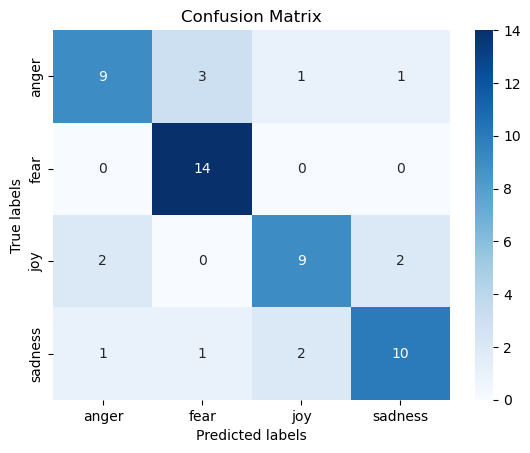

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Replace y_true and y_pred with your actual data
y_true = np.array(test['num_label']) # True labels
y_pred = predicted_labels_test  # Predicted labels

# Create the confusion matrix
label = ["anger", "fear", "joy", "sadness"]
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, cmap="Blues", annot = True, fmt='d', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [50]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7636363636363637


In [ ]:
test["pred"] = predicted_labels_test
test

In [ ]:
test.to_csv("cek_data.csv")

### GET THE DATA PREDICITION

In [ ]:
# Generate and pad the validation sequences
all_sequences = tokenizer.texts_to_sequences(train['filtering'])
all_padded = pad_sequences(all_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)





In [ ]:
hasil = model.predict(all_padded)
hasil

In [ ]:
# Get the index of the maximum probability for each row
predicted_labels_all = np.argmax(hasil, axis=1)
predicted_labels_all

In [ ]:
datas = train[['filtering',"num_label"]]

In [ ]:
label_pred = pd.DataFrame(predicted_labels_all)
label_pred

In [ ]:
merged_df = pd.concat([datas, label_pred], axis=1)
merged_df

In [ ]:
aw = merged_df[merged_df['num_label']!=merged_df[0]]
aw

In [ ]:
aw.to_csv("dataxxzz.csv",index=False)


In [ ]:
num = aw['num'].to_list()
len(num)

In [ ]:
train

In [ ]:
filtered_df = train[~train["num"].isin(num)]

In [ ]:
filtered_df

In [ ]:
train = filtered_df[["label", "tweet"]]

In [ ]:
train = train.reset_index(drop = True)

In [ ]:
train

In [ ]:
train.to_csv("Data_deleted.csv")